In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

## Investigating ROIs
#### Which ROIs show poor reproducibility across the board?

In [2]:
roi_df = pd.read_csv('rois/rois.csv')
roi_df_melt = pd.melt(roi_df, id_vars=['labels'])

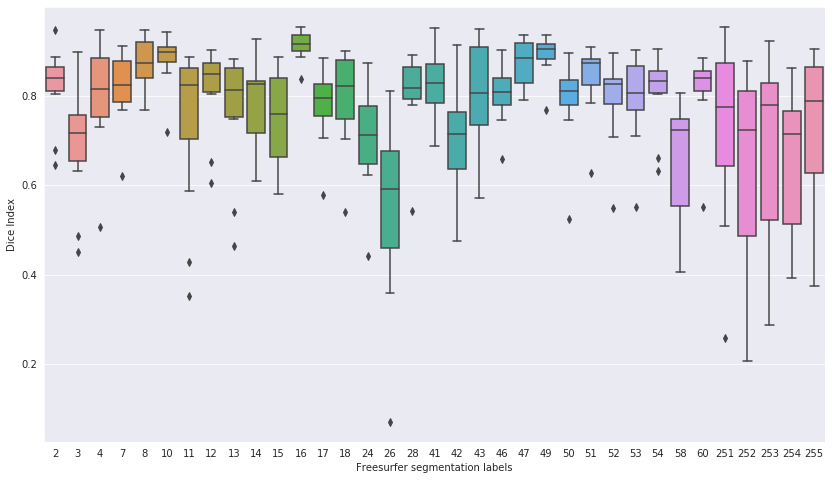

In [3]:
plt.figure(figsize=(14,8))
cat3 = sns.boxplot(x="labels", y="value", data=roi_df_melt)
cat3.set_ylabel("Dice Index")
cat3.set_xlabel("Freesurfer segmentation labels")
plt.savefig("svgs/ROI_dice.svg")

### Break down by acquisition mode: active motion correction or passive motion tracking

In [4]:
roi_df2 = pd.read_csv('rois/rois3.csv')
active_cols = [col for col in roi_df2.columns if 'active' in col]
active_cols.insert(0, 'labels')
roi_df2_active = roi_df2[active_cols]
passive_cols = [col for col in roi_df2.columns if 'passive' in col]
passive_cols.insert(0, 'labels')
roi_df2_passive = roi_df2[passive_cols]
roi_df2_active_melt = pd.melt(roi_df2_active, id_vars=['labels'])
roi_df2_passive_melt = pd.melt(roi_df2_passive, id_vars=['labels'])

### Active

Text(0.5, 0, 'Freesurfer segmentation labels')

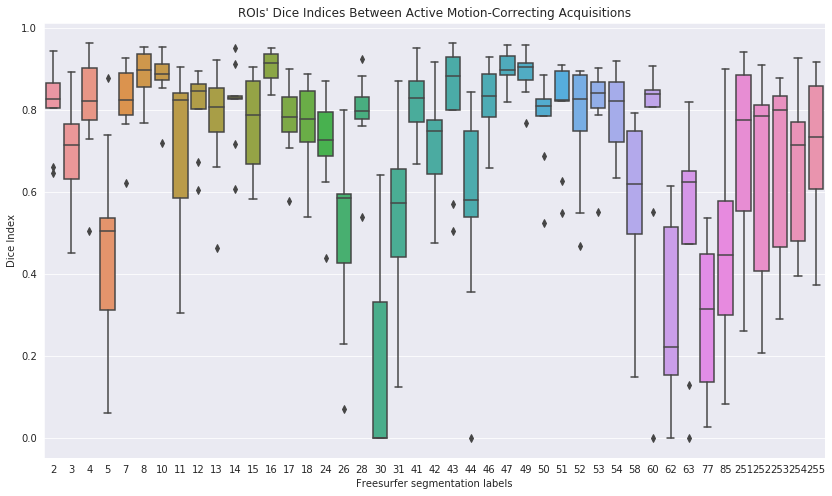

In [5]:
plt.figure(figsize=(14,8))
cat3 = sns.boxplot(x="labels", y="value", data=roi_df2_active_melt)
cat3.set_title("ROIs' Dice Indices Between Active Motion-Correcting Acquisitions")
cat3.set_ylabel("Dice Index")
cat3.set_xlabel("Freesurfer segmentation labels")

### Passive

Text(0.5, 0, 'Freesurfer segmentation labels')

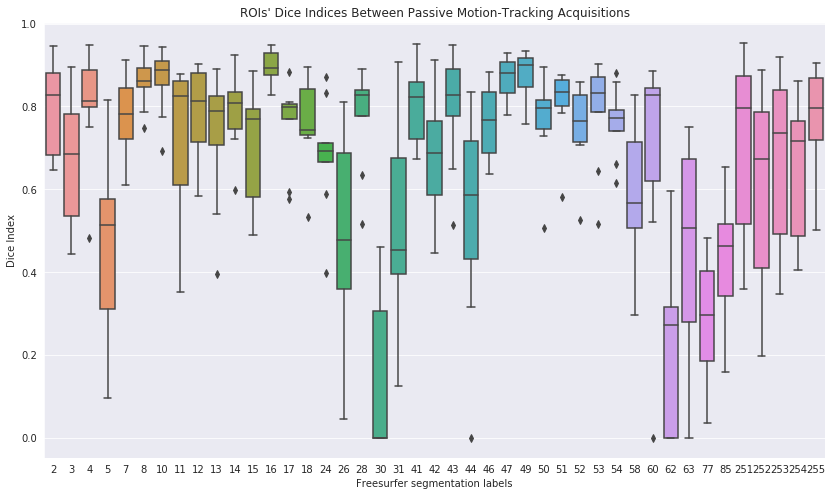

In [6]:
plt.figure(figsize=(14,8))
cat3 = sns.boxplot(x="labels", y="value", data=roi_df2_passive_melt)
cat3.set_title("ROIs' Dice Indices Between Passive Motion-Tracking Acquisitions")
cat3.set_ylabel("Dice Index")
cat3.set_xlabel("Freesurfer segmentation labels")

[Here](https://surfer.nmr.mgh.harvard.edu/fswiki/FsTutorial/AnatomicalROI/FreeSurferColorLUT) is the lookup table for the ROI labels.

## Dice Indices by acquisition type
#### Comparing reproducibility between 'active' and 'passive' measures

In [7]:
df = pd.read_csv('dice/dice.csv')  # Before pilot_08 and pilot_05 were added
df2 = pd.read_csv('dice/dice2.csv') # Including pilot_08 and pilot_05
df3 = pd.read_csv('dice/dice3.csv') # Fixed pilot_05 active

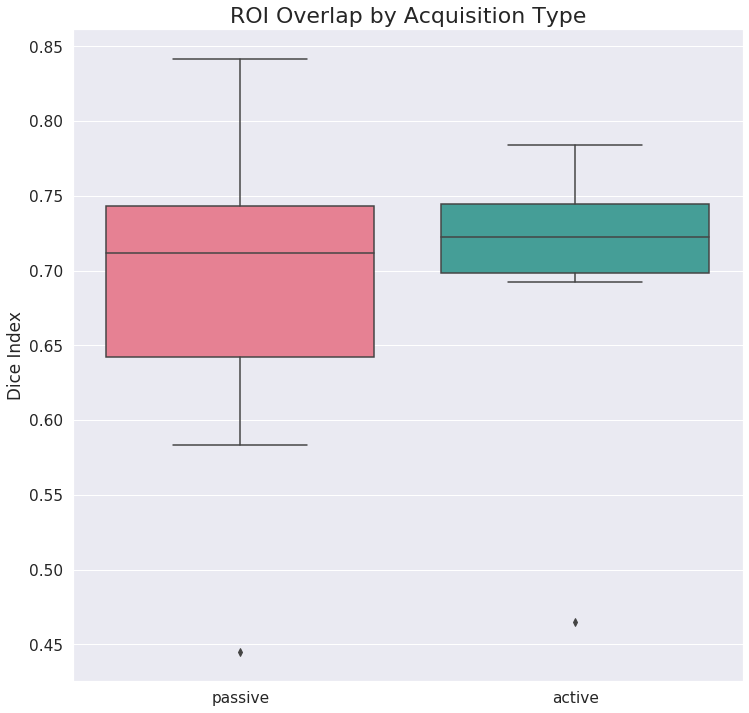

In [8]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
cat2 = sns.boxplot(x="mode", y="dice", data=df, palette="husl")
cat2.axes.set_title("ROI Overlap by Acquisition Type", fontsize=22)
cat2.set_xlabel("")
cat2.set_ylabel("Dice Index")
plt.savefig("svgs/moco_dice.svg")

Text(0, 0.5, 'Dice Index')

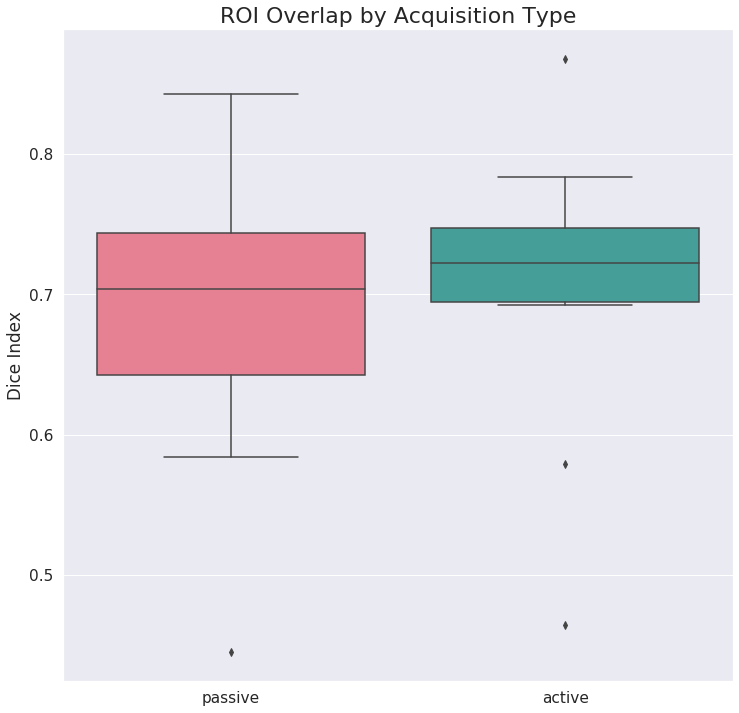

In [9]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
cat2 = sns.boxplot(x="mode", y="dice", data=df2, palette="husl")
cat2.axes.set_title("ROI Overlap by Acquisition Type", fontsize=22)
cat2.set_xlabel("")
cat2.set_ylabel("Dice Index")
# plt.savefig("svgs/moco_dice.svg")

In [10]:
basal_ganglia = [11, 12, 13, 26, 27, 50, 51, 52, 58, 59] # identify basal ganglia labels from lookup table
bg_df = roi_df2.loc[roi_df2['labels'].isin(basal_ganglia)] # create dataframe w/ basal ganglia rois

bg_df.loc['mean'] = bg_df.mean()
bg_df = bg_df.transpose()
# Make header make sense, reset index for "mode" command
header = bg_df.iloc[0]
bg_df = bg_df[1:]
bg_df.columns = header
bg_df.reset_index(inplace=True)
bg_df.rename(columns = {'index':'subjects', 'labels': 'index', bg_df.columns[-1]: "mean" }, inplace = True)
# Add a column specifying mode for that row
bg_df['mode'] = np.where(bg_df['subjects'].str.endswith('passive'), 'passive', 'active')
bg_df

/home/will/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


labels,subjects,11.0,12.0,13.0,26.0,50.0,51.0,52.0,58.0,mean,mode
0,gonzalez_alegre_pilot_09_passive,0.824888,0.812410,0.746806,0.478981,0.784197,0.820247,0.744147,0.539162,0.718855,passive
1,gonzalez_alegre_pilot_09_active,0.821429,0.847824,0.806146,0.491525,0.801083,0.824836,0.848648,0.617940,0.757429,active
2,gonzalez_alegre_pilot_13_passive,0.877471,0.889004,0.891216,0.686998,0.805966,0.843479,0.812452,0.711586,0.814772,passive
3,gonzalez_alegre_pilot_13_active,0.840006,0.862447,0.853415,0.584828,0.817466,0.871790,0.826965,0.741700,0.799827,active
4,gonzalez_alegre_pilot_11_passive,0.570996,0.584100,0.396570,0.047059,0.506862,0.582660,0.526707,0.297585,0.439067,passive
5,gonzalez_alegre_pilot_11_active,0.586047,0.605252,0.464166,0.070922,0.524071,0.627190,0.549131,0.405797,0.479072,active
6,gonzalez_alegre_pilot_08_passive,0.351717,0.650873,0.539836,0.359073,0.745383,0.784405,0.827430,0.507104,0.595728,passive
7,gonzalez_alegre_pilot_08_active,0.303878,0.673704,0.661434,0.228814,0.687450,0.548225,0.466983,0.148503,0.464874,active
8,gonzalez_alegre_pilot_05_passive,0.862326,0.902493,0.881456,0.810099,0.896248,0.876491,0.706732,0.806954,0.842850,passive
9,gonzalez_alegre_pilot_05_active,0.903452,0.893794,0.922370,0.738205,0.808247,0.897876,0.895378,0.747361,0.850835,active


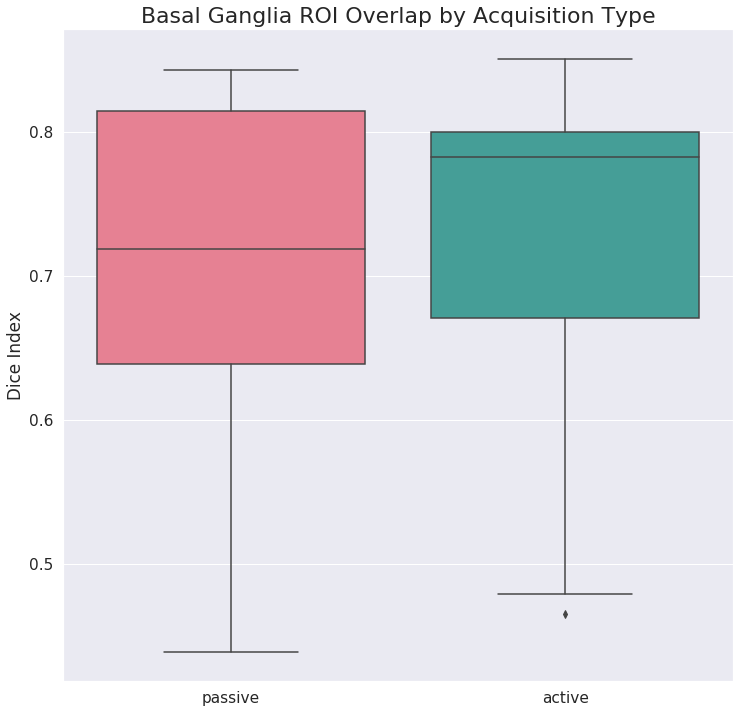

In [11]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.4)
cat2 = sns.boxplot(x="mode", y="mean", data=bg_df, palette="husl")
cat2.axes.set_title("Basal Ganglia ROI Overlap by Acquisition Type", fontsize=22)
cat2.set_xlabel("")
cat2.set_ylabel("Dice Index")
plt.savefig("svgs/mocos_dice_bg.svg")

## Volume correlations
#### Comparing reproducibility between 'active' and 'passive' measures

In [12]:
volumes = pd.read_csv('vols/volumes.csv')
values=["Left-Thalamus-Proper","Left-Caudate","Left-Putamen","Left-Pallidum","Left-Hippocampus","Left-Amygdala","CSF","Left-Accumbens-area","Left-VentralDC","Right-Thalamus-Proper","Right-Caudate","Right-Putamen","Right-Pallidum","Right-Hippocampus","Right-Amygdala","Right-Accumbens-area","Right-VentralDC","CC_Posterior","CC_Mid_Posterior","CC_Central","CC_Mid_Anterior","CC_Anterior"]
volumes_pivot = volumes.pivot(index="Measure:volume", columns='Mode', values=values)

In [13]:
df_list = []
for val in values:
    df = volumes_pivot[val]
    df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True)

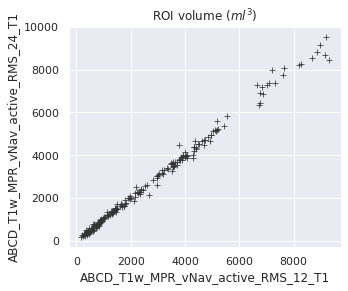

In [14]:
sns.set(font_scale=1)

sns.relplot(x="active_12", y="active_24", color=".2", marker="+", data=master_df)
plt.title("ROI volume ($ml^3$)")
plt.xlabel("ABCD_T1w_MPR_vNav_active_RMS_12_T1")
plt.ylabel("ABCD_T1w_MPR_vNav_active_RMS_24_T1")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.savefig('svgs/corr_active.svg')

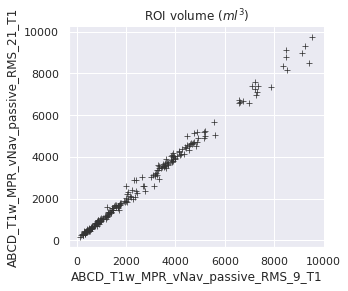

In [15]:
sns.relplot(x="passive_9", y="passive_21", color=".2", marker="+", data=master_df)
plt.title("ROI volume ($ml^3$)")
plt.xlabel("ABCD_T1w_MPR_vNav_passive_RMS_9_T1")
plt.ylabel("ABCD_T1w_MPR_vNav_passive_RMS_21_T1")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.savefig('svgs/corr_passive.svg')

# Just basal ganglia

In [16]:
values=["Left-Caudate","Left-Putamen","Left-Pallidum","Left-Accumbens-area", "Right-Caudate","Right-Putamen","Right-Pallidum","Right-Accumbens-area"]
volumes_pivot2 = volumes.pivot(index="Measure:volume", columns='Mode', values=values)

In [17]:
df_list2 = []
for val in values:
    df = volumes_pivot2[val]
    df_list2.append(df)
master_df2 = pd.concat(df_list2, ignore_index=True)

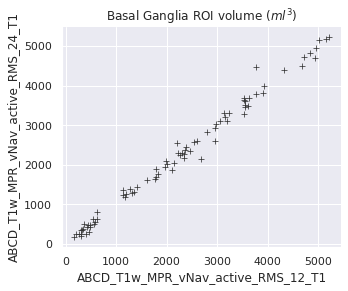

In [18]:
sns.relplot(x="active_12", y="active_24", color=".2", marker="+", data=master_df2)
plt.title("Basal Ganglia ROI volume ($ml^3$)")
plt.xlabel("ABCD_T1w_MPR_vNav_active_RMS_12_T1")
plt.ylabel("ABCD_T1w_MPR_vNav_active_RMS_24_T1")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.savefig('svgs/bg_corr_active.svg')

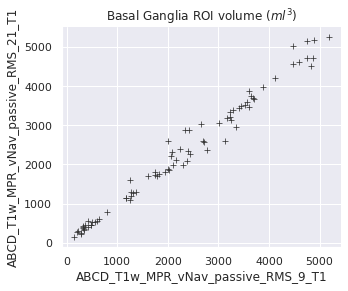

In [19]:
sns.relplot(x="passive_9", y="passive_21", color=".2", marker="+", data=master_df2)
plt.title("Basal Ganglia ROI volume ($ml^3$)")
plt.xlabel("ABCD_T1w_MPR_vNav_passive_RMS_9_T1")
plt.ylabel("ABCD_T1w_MPR_vNav_passive_RMS_21_T1")
plt.tight_layout()
plt.subplots_adjust(top=0.75)
plt.savefig('svgs/bg_corr_passive.svg')